In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Работа с массивами NumPy

**N. Все упражнения ниже нужно делать без использования циклов Python**

**1.** Cоздать вектор

$$(2, \frac{2^2}{2}, \ldots, \frac{2^{20}}{20})$$

Можно использовать функции [np.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html), [np.ones()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)

In [3]:
a = np.arange(1,21)
print(2**a/a)

[2.00000000e+00 2.00000000e+00 2.66666667e+00 4.00000000e+00
 6.40000000e+00 1.06666667e+01 1.82857143e+01 3.20000000e+01
 5.68888889e+01 1.02400000e+02 1.86181818e+02 3.41333333e+02
 6.30153846e+02 1.17028571e+03 2.18453333e+03 4.09600000e+03
 7.71011765e+03 1.45635556e+04 2.75941053e+04 5.24288000e+04]


**2.** Посчитать:

$$\sum\limits_{i=0}^{5}{0.1^{3i}0.2^{4i}}$$


In [4]:
i = np.arange(0,6)
ans = (0.1**3*0.2**4)**i
print(ans.sum())

1.00000160000256


**3.** Создать нулевую матрицe $8 \times 8$, и заполнить её единицами в шахматном порядке.

In [5]:
a = np.zeros((8,8),dtype = 'int64')
a[::2,1::2] = 1
a[1::2,::2] = 1
print(a)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


**4.** Есть 5 точек в декартовой системе координат (в виде матрицы $X$ размерностью $5 \times 2$), сконвертируйте эти точки в полярную систему координат.

In [6]:
X = np.random.random((5, 2))
ans = np.array([np.sum(X**2,axis = 1)**0.5,np.arccos(X[:,0]/(np.sum(X**2,axis = 1)**0.5))]).T
print(ans)

[[0.70556016 0.74345346]
 [0.66190022 0.94911059]
 [0.62051466 0.52779777]
 [0.93448753 0.29686709]
 [0.89695294 1.22619338]]


**5.** Найдите индексы максимального элемента в случайной матрице $10 \times 10$.

Cм. [np.argmax()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html).

In [7]:
X = np.random.random((10, 10))
ind = np.unravel_index(np.argmax(X, axis=None), X.shape)
print(ind,'\n',X[ind])

(5, 2) 
 0.9865187514916959


**6.** Есть 10 точек ($X$) и ещё одна ($y$). Найти в $X$ ближайшую к $y$ точку.

In [8]:
X = np.random.random((10, 2))
y = np.random.random((1, 2))
ans = np.argmin(np.sum((X+(-1)*y)**2,axis=1)**0.5)
print(X[ans],'\n',ans)

[0.15079409 0.30241572] 
 4


**7.** Дана функция:

$$
 \begin{cases}
    x^2 + 2x + 6, & x < 0  \\
    x + 6, & 0 \le x \le 2 \\
    x^2 + 4x - 4, & x \ge 2
 \end{cases}
$$

Постройте массив из её значений на  $-3 \le x \le 3$.

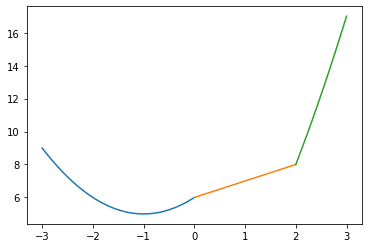

In [9]:
%matplotlib inline
def func(x):
    return x**2+2*x+6
def func1(x):
    return x+6
def func2(x):
    return x**2+4*x-4
x = np.linspace(-3,0,100)
x1 = np.linspace(0,2,100)
x2 = np.linspace(2,3,10)
plt.plot(x,func(x))
plt.plot(x1,func1(x1))
plt.plot(x2,func2(x2))

**8.** Из каждого элемента матрицы вычесть среднее арифметическое от всех элементов в соответствующей строке (после чего среднее значение каждой строки должно равняться нулю).

Cм. [np.mean()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).

In [10]:
X = np.random.random((10, 10))
ans = np.mean(X-(np.mean(X,axis = 1)).reshape(10,1),axis = 1)
print(ans)

[ 4.44089210e-17 -1.44328993e-16 -2.22044605e-17  4.44089210e-17
 -3.33066907e-17 -5.55111512e-17 -2.22044605e-17 -2.22044605e-17
  5.55111512e-17 -4.44089210e-17]


**9.** Есть массив из 1000 чисел, полученных из генератора случайных чисел, имеющий нормальное распределение. Посчитайте выборочное среднее и выборочную дисперсию. 

In [11]:
X = np.random.normal(loc=5, scale=2., size=1000)
sam_mean = np.sum(X)/1000
sam_var = np.sum(((X-sam_mean)**2))/1000
print('Выборочное среднее : ', sam_mean,'\nВыборочная дисперсия : ',sam_var)

Выборочное среднее :  4.984197466273309 
Выборочная дисперсия :  4.035343869997446


**10.** Создать матрицу:

$$
\begin{pmatrix}
0 & 1 & 2 & 3 & 4 \\
1 & 2 & 3 & 4 & 0 \\
2 & 3 & 4 & 0 & 1 \\
3 & 4 & 0 & 1 & 2 \\
4 & 0 & 1 & 2 & 3
\end{pmatrix}
$$

In [56]:
ans = ((np.ones((6,5),)*np.arange(5)).reshape(5,6))[:,:5]
print(ans)

[[0. 1. 2. 3. 4.]
 [1. 2. 3. 4. 0.]
 [2. 3. 4. 0. 1.]
 [3. 4. 0. 1. 2.]
 [4. 0. 1. 2. 3.]]


In [5]:
(np.ones((6,5),)*np.arange(5)).reshape(5,6)


array([[0., 1., 2., 3., 4., 0.],
       [1., 2., 3., 4., 0., 1.],
       [2., 3., 4., 0., 1., 2.],
       [3., 4., 0., 1., 2., 3.],
       [4., 0., 1., 2., 3., 4.]])